# Plotting with Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) [Gallery](https://seaborn.pydata.org/examples/index.html)

## Quick Demo

### Index

- [HeatMap](#Heatmap)

### Environment

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import logging
logging.getLogger('seaborn').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

### Sample datasets

In [3]:
 sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [4]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes.head(2)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK


In [5]:
titanic = sns.load_dataset("titanic")
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


###  DataFrame & Columns

In [6]:
df = car_crashes
# df = titanic

categorial_column_types = ['object','datetime']

intervals = df.select_dtypes(exclude=categorial_column_types).columns.values.tolist()
categorials = df.select_dtypes(include=categorial_column_types).columns.values.tolist()

intervals, categorials

(['total',
  'speeding',
  'alcohol',
  'not_distracted',
  'no_previous',
  'ins_premium',
  'ins_losses'],
 ['abbrev'])

## Co-relation Matrix 

### Heatmap

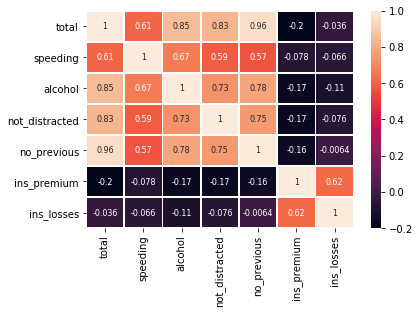

In [7]:
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .9,
            annot_kws = {"size": 8})

### Scatter + Histogram

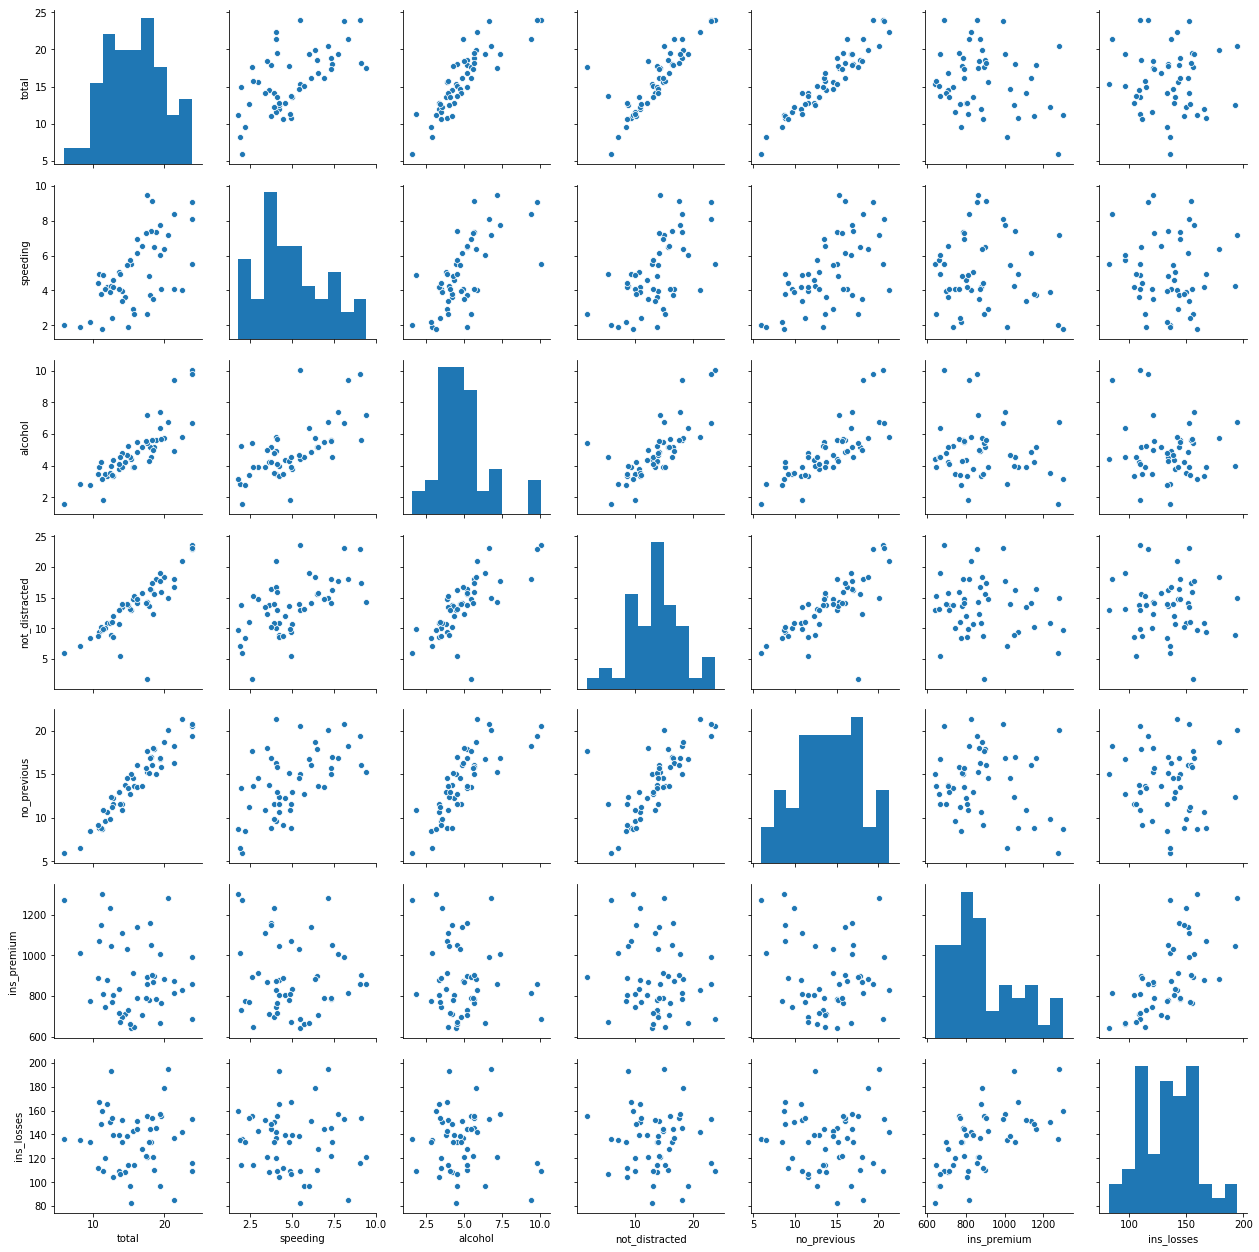

In [8]:
sns.pairplot(df)

### Bar

In [ ]:
ax1 = sns.countplot(x = categorials[1], data = df.sample(10))

In [ ]:
sns.barplot(x = intervals[0], 
            y = intervals[2],
            data = df.nlargest(10, intervals[0]))

### Histogram & Scatter/HexBin

In [ ]:
sns.jointplot(x = intervals[2], y = intervals[0], data=df, kind='hex')
sns.jointplot(x = intervals[2], y = intervals[0], data=df, kind='scatter')

In [ ]:
if id(df) == id(car_crashes):
    df['log(speeding)'] = df['speeding'].apply(np.log)
    df.head(2)